## Taylor

In [84]:
from typing import Callable
import sympy as sym

def taylor_approx(fcn: Callable[[float], float], x0: float, n: int) -> sym.Symbol:
    x = sym.symbols("x")
    f = sym.sympify(fcn(x))
    taylor: sym.Symbol = 0
    for i in range(n + 1):
        term = f.diff(x, i).subs(x, x0) / sym.factorial(i) * (x - x0) ** i
        taylor += term
    return taylor


def f(x):
   return 1 / (25*x**2 + 1)
pol_taylor = taylor_approx(f, 0, 5)
pol_taylor

625*x**4 - 25*x**2 + 1

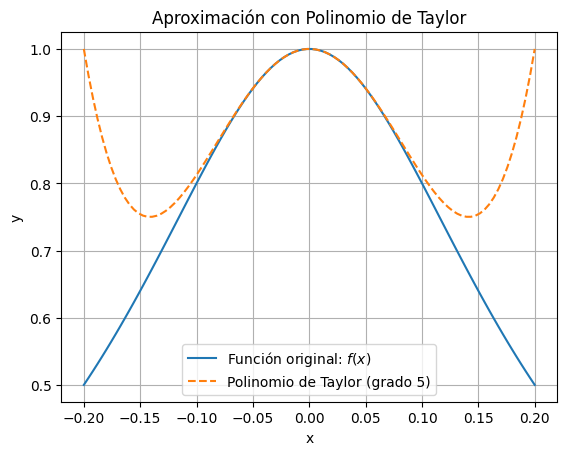

In [44]:
# Define the range for plotting
x_range = np.linspace(-0.2, 0.2, 100)

# Calculate the Taylor polynomial of degree 5
pol_taylor = taylor_approx(f, 0, 5)

# Convert the symbolic expression to a numerical function
f_num = sym.lambdify(x, f(x))
pol_taylor_num = sym.lambdify(x, pol_taylor)

# Plot the original function and its Taylor approximation
plt.plot(x_range, f_num(x_range), label='Función original: $f(x)$')
plt.plot(x_range, pol_taylor_num(x_range), label='Polinomio de Taylor (grado 5)',  linestyle="--")
plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximación con Polinomio de Taylor')
plt.show()

In [79]:
from typing import Callable
import sympy as sym

# Definición de la función para obtener el polinomio de Taylor
def taylor_approx(fcn: Callable[[float], float], x0: float, n: int) -> sym.Symbol:
    """
    Calcula el polinomio de Taylor de una función en un punto dado.
    
    :param fcn: Función simbólica que se desea aproximar
    :param x0: Punto alrededor del cual se expande el polinomio
    :param n: Grado del polinomio de Taylor
    :return: Polinomio de Taylor como expresión simbólica
    """
    x = sym.symbols("x")
    f = sym.sympify(fcn(x))
    taylor: sym.Symbol = 0
    for i in range(n + 1):
        term = f.diff(x, i).subs(x, x0) / sym.factorial(i) * (x - x0) ** i
        taylor += term
    return taylor

# Función simbólica
def f2(x):
    return sym.atan(x)

# Cálculo del polinomio de Taylor para arctan(x) alrededor de x0 = 1
pol_taylor = taylor_approx(f2, x0=1, n=5)
pol_taylor


x/2 - (x - 1)**5/40 + (x - 1)**3/12 - (x - 1)**2/4 - 1/2 + pi/4

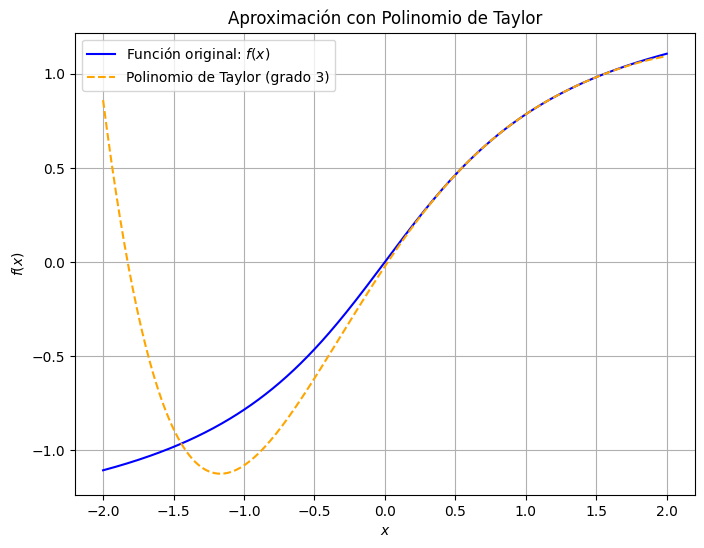

In [72]:
# Conversión del polinomio simbólico a función numérica
x = sym.symbols("x")
taylor_func = sym.lambdify(x, pol_taylor, "numpy")
original_func = sym.lambdify(x, f(x), "numpy")

# Rango de valores para graficar
x_vals = np.linspace(-2, 2, 400)
y_original = original_func(x_vals)
y_taylor = taylor_func(x_vals)

# Gráfica
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_original, label="Función original: $f(x)$", color="blue")
plt.plot(x_vals, y_taylor, label=f"Polinomio de Taylor (grado {n-1})", color="orange", linestyle="--")
plt.title("Aproximación con Polinomio de Taylor")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.grid()
plt.show()

## Lagrange

In [89]:
from scipy.interpolate import lagrange

X = [-0.4, 0, 0.4]
Y = [0.2, 1, 0.2]

polynomial = lagrange(X, Y)
print(polynomial)

    2
-5 x + 1


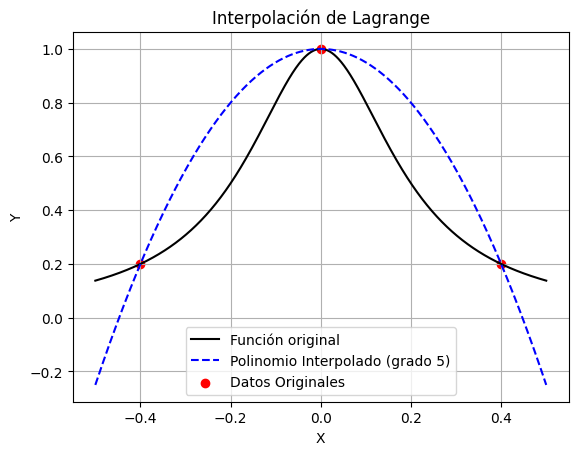

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from typing import Callable, Tuple

def plot_lagrange(fcn: Callable[[float], float], polynomial: Callable[[float], float], 
                  n: int, x_range: Tuple[float, float], X: np.ndarray, Y: np.ndarray):
    """
    Grafica la función original, el polinomio interpolado y los puntos originales.
    
    Parámetros:
        fcn (Callable): La función original.
        polynomial (Callable): El polinomio de interpolación.
        n (int): Grado del polinomio interpolado.
        x_range (Tuple[float, float]): Rango del eje x para graficar.
        X (np.ndarray): Puntos x originales.
        Y (np.ndarray): Puntos y originales.
    """
    # Variable simbólica
    x = sym.symbols("x")
    
    # Puntos para graficar la función original
    x_vals = np.linspace(x_range[0], x_range[1], 1000)
    original_fcn = sym.lambdify(x, fcn(x), "numpy")
    y_vals = original_fcn(x_vals)
    plt.plot(x_vals, y_vals, label="Función original", color="black")
    
    # Puntos para graficar el polinomio interpolado
    y_poly_vals = polynomial(x_vals)
    plt.plot(x_vals, y_poly_vals, label=f"Polinomio Interpolado (grado {n})", color="blue", linestyle="--")
    
    # Puntos originales
    plt.scatter(X, Y, color="red", label="Datos Originales")
    
    # Etiquetas y formato
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Interpolación de Lagrange")
    plt.legend()
    plt.grid(True)
    plt.show()


plot_lagrange(f, polynomial, 5, (-0.5, 0.5), X, Y)

In [108]:
X = [0, 1, 2]
Y = [0, 0.79, 1.107]

polynomial = lagrange(X, Y)
print(polynomial)

         2
-0.2365 x + 1.026 x


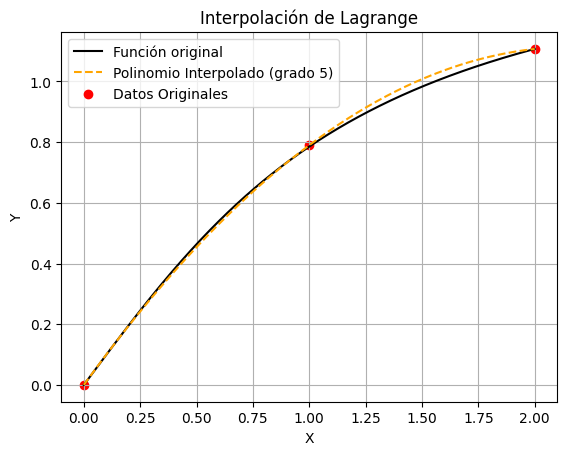

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from typing import Callable, Tuple

def plot_lagrange(fcn: Callable[[float], float], polynomial: Callable[[float], float], 
                  n: int, x_range: Tuple[float, float], X: np.ndarray, Y: np.ndarray):
    """
    Grafica la función original, el polinomio interpolado y los puntos originales.
    Parámetros:
        fcn (Callable): La función original.
        polynomial (Callable): El polinomio de interpolación.
        n (int): Grado del polinomio interpolado.
        x_range (Tuple[float, float]): Rango del eje x para graficar.
        X (np.ndarray): Puntos x originales.
        Y (np.ndarray): Puntos y originales.
    """
    # Variable simbólica
    x = sym.symbols("x")
    
    # Puntos para graficar la función original
    x_vals = np.linspace(x_range[0], x_range[1], 1000)
    original_fcn = sym.lambdify(x, fcn(x), "numpy")
    y_vals = original_fcn(x_vals)
    plt.plot(x_vals, y_vals, label="Función original", color="black")
    
    # Puntos para graficar el polinomio interpolado
    y_poly_vals = polynomial(x_vals)
    plt.plot(x_vals, y_poly_vals, label=f"Polinomio Interpolado (grado {n})", color="orange",linestyle="--")
    
    # Puntos originales
    plt.scatter(X, Y, color="red", label="Datos Originales")
    
    # Etiquetas y formato
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Interpolación de Lagrange")
    plt.legend()
    plt.grid(True)
    plt.show()


plot_lagrange(f2, polynomial, 5, (0, 2), X, Y)